In [1]:
#Exploratory Data Analysis (EDA) process

In [2]:
#File warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [4]:
#CSV File Upload
data = pd.read_csv("electronic-card-transactions-april-2022-csv-tables.csv")

In [5]:
#Seeing the column names
data.columns

Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'Magnitude', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

In [6]:
#Get first n rows
data.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,ECTA.S19A1,2001.03,2462.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
1,ECTA.S19A1,2002.03,17177.2,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
2,ECTA.S19A1,2003.03,22530.5,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
3,ECTA.S19A1,2004.03,28005.1,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN
4,ECTA.S19A1,2005.03,30629.6,NaN,F,Dollars,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries,NaN,NaN,NaN


In [7]:
#check for missing values
data.isnull().sum()

Series_reference        0
Period                  0
Data_value           1611
Suppressed          18146
STATUS                  0
UNITS                   0
Magnitude               0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2          0
Series_title_3      14968
Series_title_4      18636
Series_title_5      18636
dtype: int64

In [8]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18636 entries, 0 to 18635
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  18636 non-null  object 
 1   Period            18636 non-null  float64
 2   Data_value        17025 non-null  float64
 3   Suppressed        490 non-null    object 
 4   STATUS            18636 non-null  object 
 5   UNITS             18636 non-null  object 
 6   Magnitude         18636 non-null  int64  
 7   Subject           18636 non-null  object 
 8   Group             18636 non-null  object 
 9   Series_title_1    18636 non-null  object 
 10  Series_title_2    18636 non-null  object 
 11  Series_title_3    3668 non-null   object 
 12  Series_title_4    0 non-null      float64
 13  Series_title_5    0 non-null      float64
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [9]:
#Statistical Summary
data.describe()

,Period,Data_value,Magnitude,Series_title_4,Series_title_5
count,18636.000000,1.702500e+04,18636.000000,0.0,0.0
mean,2011.418589,1.583546e+07,4.208950,NaN,NaN
std,6.070323,8.696847e+07,2.745695,NaN,NaN
min,2000.010000,-5.130000e+01,0.000000,NaN,NaN
25%,2006.090000,1.767000e+02,0.000000,NaN,NaN
50%,2011.110000,1.179100e+03,6.000000,NaN,NaN
75%,2017.020000,4.260800e+03,6.000000,NaN,NaN
max,2022.040000,1.874441e+09,6.000000,NaN,NaN


In [10]:
#Drop the unwanted columns
data.drop(data.columns[[3, 4, 5, 11, 12, 13]], axis = 1, inplace= True)

In [11]:
data.head()

,Series_reference,Period,Data_value,Magnitude,Subject,Group,Series_title_1,Series_title_2
0,ECTA.S19A1,2001.03,2462.5,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
1,ECTA.S19A1,2002.03,17177.2,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
2,ECTA.S19A1,2003.03,22530.5,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
3,ECTA.S19A1,2004.03,28005.1,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries
4,ECTA.S19A1,2005.03,30629.6,6,Electronic Card Transactions (ANZSIC06) - ECT,Total values - Electronic card transactions A/...,Actual,RTS total industries


In [12]:
#check for missing values
data.isnull().sum()

Series_reference       0
Period                 0
Data_value          1611
Magnitude              0
Subject                0
Group                  0
Series_title_1         0
Series_title_2         0
dtype: int64

In [13]:
#Imputing the missing value
updated_data = data
updated_data['Data_value'] = updated_data['Data_value'].fillna(updated_data['Data_value'].mean())
#updated_data.info

In [14]:
updated_data.isnull().sum()

Series_reference    0
Period              0
Data_value          0
Magnitude           0
Subject             0
Group               0
Series_title_1      0
Series_title_2      0
dtype: int64

<AxesSubplot:>

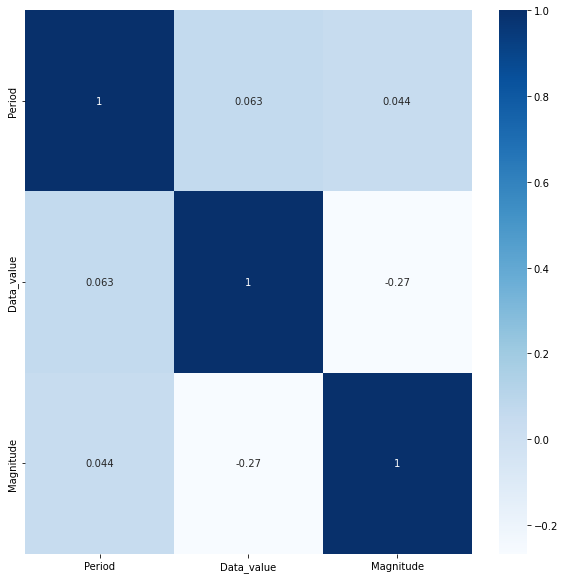

In [15]:
#sns heatmap -> Checking the correlations between different variables
plt.figure(figsize=(10, 10))
sns.heatmap(updated_data.corr(), cbar=True, annot=True, cmap="Blues")

Text(0, 0.5, 'Data Value in dollars')

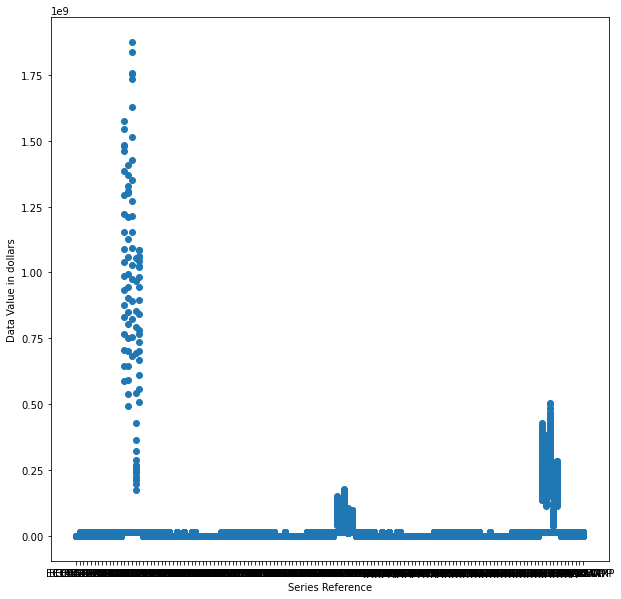

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter (x="Series_reference", y= "Data_value", data =  updated_data)
plt.xlabel('Series Reference')
plt.ylabel('Data Value in dollars')

In [17]:
updated_data.columns

Index(['Series_reference', 'Period', 'Data_value', 'Magnitude', 'Subject',
       'Group', 'Series_title_1', 'Series_title_2'],
      dtype='object')

<AxesSubplot:xlabel='Data_value', ylabel='Density'>

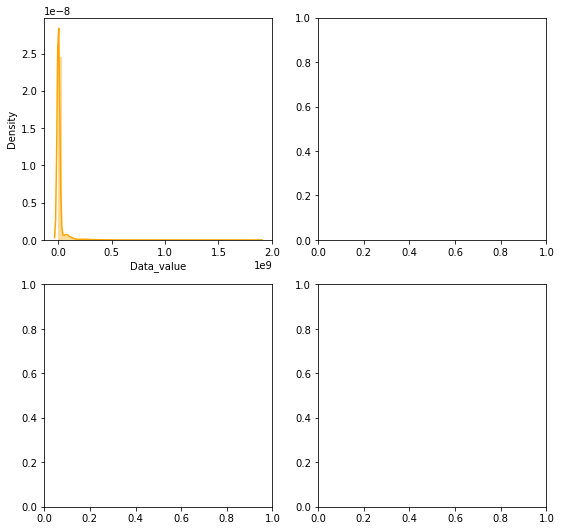

In [18]:
#Boxplot graph
import seaborn as sns
f, axes = plt.subplots(2, 2, figsize=(9, 9))
            
sns.distplot(updated_data['Data_value'] , color="orange", ax=axes[0, 0])

<AxesSubplot:xlabel='Data_value'>

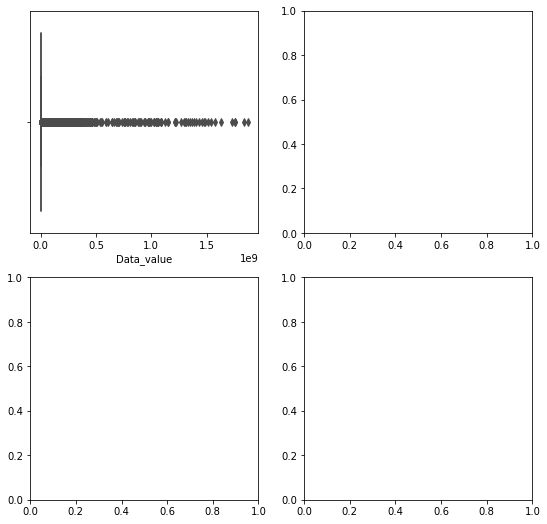

In [19]:
#checking for outliers
import seaborn as sns
f, axes = plt.subplots(2, 2, figsize=(9, 9))
            
sns.boxplot(updated_data['Data_value'] , color="orange", ax=axes[0, 0])